In [17]:
# imports
import numpy as np
import pandas as pd
import hashlib
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [18]:
# connect to local elastic search host
HOST = 'http://localhost:9200/'
es = Elasticsearch(hosts=[HOST])
INDEX = 'info_clone2'# 'info' # 
SUBJECT = 'imports'# 'functions'
COLOR = 'g' # 'g'################ g for me, b for rule

In [19]:
es.ping()

True

In [20]:
s = Search(using=es, index=INDEX)
q = Q("wildcard", name='*') 
#q = Q("wildcard", name='Untitled*') # get all untitled files
#q = Q("match", name='Untitled.ipynb') # get only Untitled files

In [21]:
N = 10000
query = s.query(q).extra(size=N)
response = query.execute()

In [22]:
len(response)

10000

In [23]:
# nbid = response[0].meta.id
# res = es.get(index='code', id=nbid)
# print(res['_source'])

In [24]:
total = []
for i in range(N):
    name = response[i]['name']
    nbid = response[i].meta.id
    coderes = es.get(index='code', id=nbid)
    imp = coderes['_source'][SUBJECT]
    for item in imp:
        total.append(item[0])

In [25]:
x = np.array(total)
items, counts = np.unique(total, axis=0, return_counts=True)

In [26]:
count_sort_ind = np.argsort(-counts)
i = items[count_sort_ind]
c = counts[count_sort_ind]

No handles with labels found to put in legend.


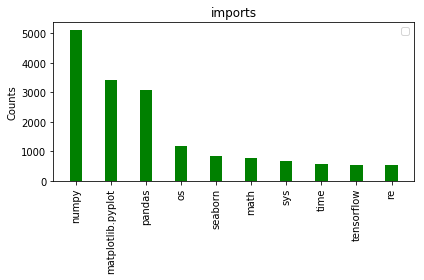

In [27]:
topN = 10
i = i[:topN]
c = c[:topN]

x = np.arange(len(i))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, c, width, color=COLOR)
ax.set_ylabel('Counts')
ax.set_title(SUBJECT)
ax.set_xticks(x)
ax.set_xticklabels(i, rotation='vertical')
ax.legend()
fig.tight_layout()
fig.savefig('figure.png')
plt.show()

In [17]:
def p(es, INDEX, N):
    s = Search(using=es, index=INDEX)
    q = Q("wildcard", name='*')
    query = s.query(q).extra(size=N)
    response = query.execute()
    total = []
    for i in range(N):
        name = response[i]['name']
        nbid = response[i].meta.id
        coderes = es.get(index='code', id=nbid)
        imp = coderes['_source'][SUBJECT]
        for item in imp:
            total.append(item[0])
    x = np.array(total)
    items, counts = np.unique(total, axis=0, return_counts=True)
    count_sort_ind = np.argsort(-counts)
    i = items[count_sort_ind]
    c = counts[count_sort_ind]
    topN = 10
    i = i[:topN]
    c = c[:topN]
    return i, c

In [18]:
my_i, my_c = p(es, 'info_clone2', N)
rule_i, rule_c = p(es, 'info', N)

In [28]:
print(my_i[:5], my_c[:5])
print(rule_i[:5], rule_c[:5])

['numpy' 'matplotlib.pyplot' 'pandas' 'os' 'seaborn'] [5115 3412 3079 1196  857]
['numpy' 'matplotlib.pyplot' 'pandas' 'os' 'seaborn'] [5311 3434 3073 1215  817]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

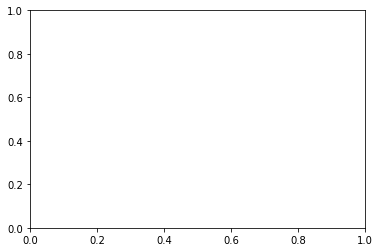

In [27]:
x = np.arange(len(my_i))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, my_c[:5], width, color='g', label='My')
rects2 = ax.bar(x+width/2, rule_c[:5], width, color='b', label='Rule')
ax.set_ylabel('Counts')
ax.set_title(SUBJECT)
ax.set_xticks(x)
ax.set_xticklabels(my_i[:5], rotation='vertical')
ax.legend()
fig.tight_layout()
fig.savefig('TEST.png')
plt.show()